# Statistical Analysis of the channels of the latent space of the AI Codec "Cheng2020"

In this notebook, we will compare the mean squared error (MSE) per channel between 
1) original and tampered images (tp)
2) two unrelated authentic images (au)

This should yield channels which differ significantly more in the tp group than in the au group.

To achieve this goal, we collect the mse-values for all tp-comparisons and all au-comparisons. A one-sided t-test will be performed per channel and significant channels will be returned for further assessments.

In [11]:
from pathlib import Path

import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import Casia2
from Casia2 import parse_casia2, get_auth_pairs_casia2
from first_compressions import assess_manipulated_images, cheng2020_model
import matplotlib.pyplot as plt

In [2]:
# Collect groups tp and au as img_name-pairs respectively
au_paths, tp_paths = parse_casia2(Path(Casia2.CASIA_PATH, "Au"), Path(Casia2.CASIA_PATH, "Tp"))
# Adapt to same structure
au_tp_pairs = []
for au_cat, tp_cat in zip(au_paths.values(), tp_paths.values()):
    for au_img, tp_img in zip(au_cat, tp_cat):
        au_tp_pairs.append((au_img, tp_img))

au_au_pairs = get_auth_pairs_casia2(Path(Casia2.CASIA_PATH, "Au"), n_pairs=Casia2.N_AU_STD // 2, seed=674)
print(au_au_pairs[:4])

[('../images/CASIA2/CASIA2.0_revised/Au/Au_cha_30573.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_ani_30575.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_ani_30558.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_arc_30157.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_pla_30487.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_arc_30460.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_art_30468.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_cha_30003.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_ani_30456.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_arc_30650.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_sec_30681.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_cha_30395.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_pla_30189.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_sec_30571.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_arc_30653.jpg', '../images/CASIA2/CASIA2.0_revised/Au/Au_cha_30363.jpg'), ('../images/CASIA2/CASIA2.0_revised/Au/Au_arc_30462.jpg', '../images/CA

In [3]:
# Calculate MSE values per channel separately for all tp and all au pairs 
""" MAKE MORE EFFICIENT """
cheng_model = cheng2020_model()

n_assess = 192

tp_mse = {}
au_mse = {}
au_mse_result = assess_manipulated_images(au_au_pairs[:100], cheng_model, n_assess_dims=n_assess)
tp_mse_result = assess_manipulated_images(au_tp_pairs[:100], cheng_model, n_assess_dims=n_assess)


(192, 100)
(192, 100)


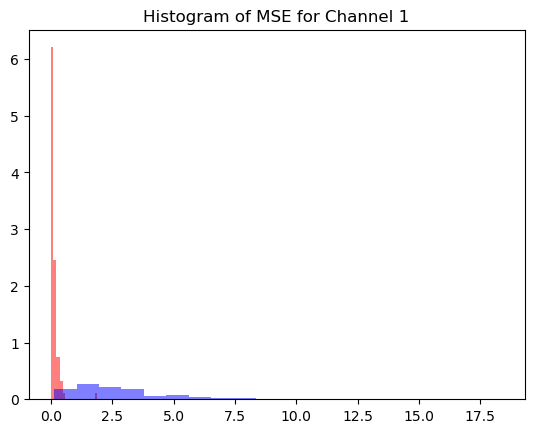

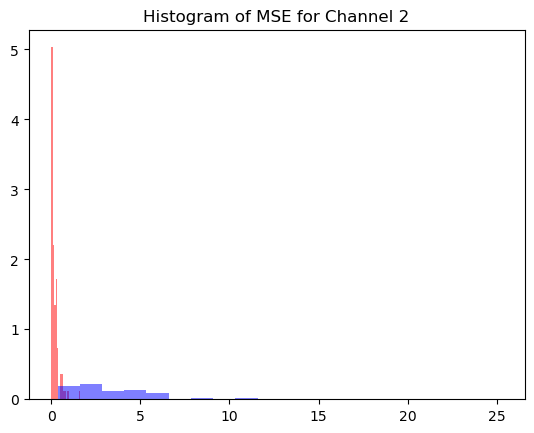

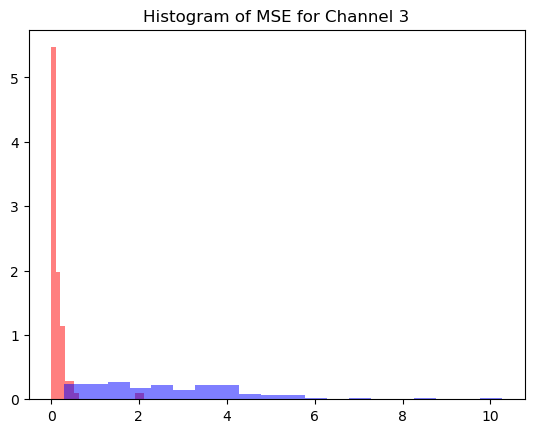

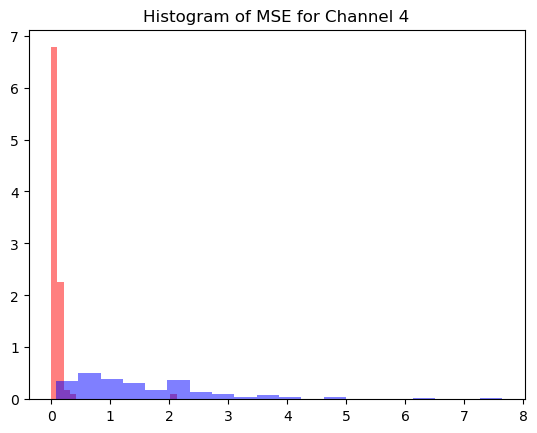

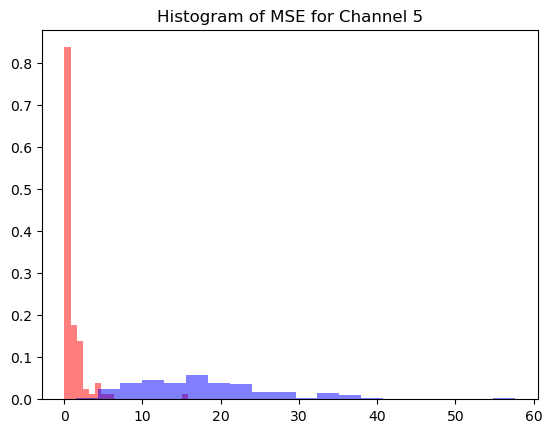

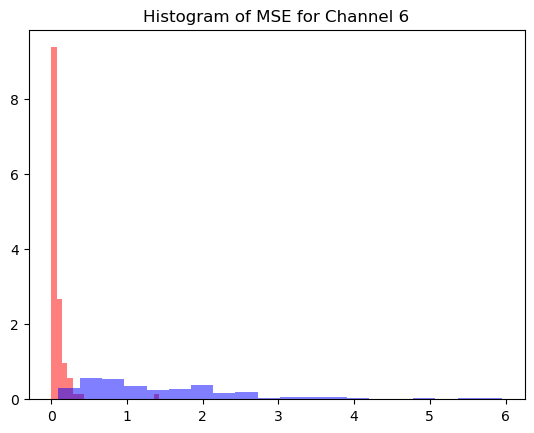

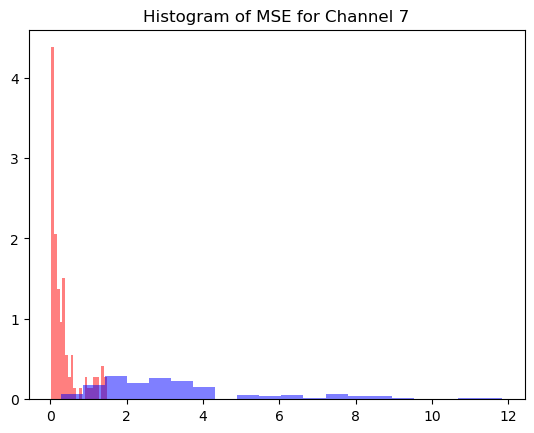

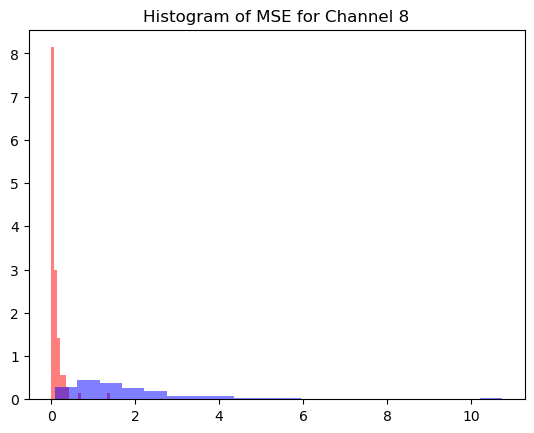

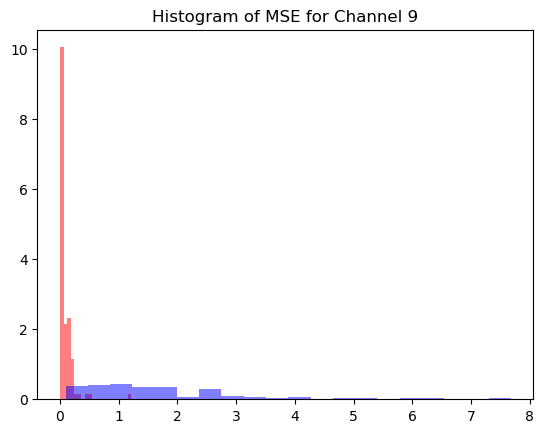

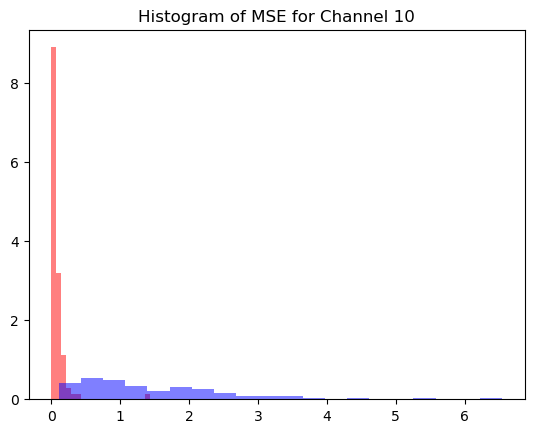

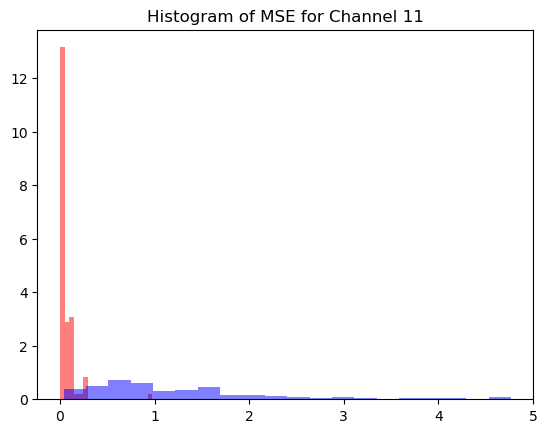

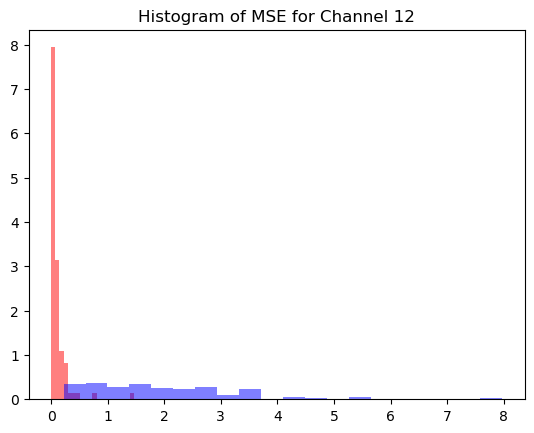

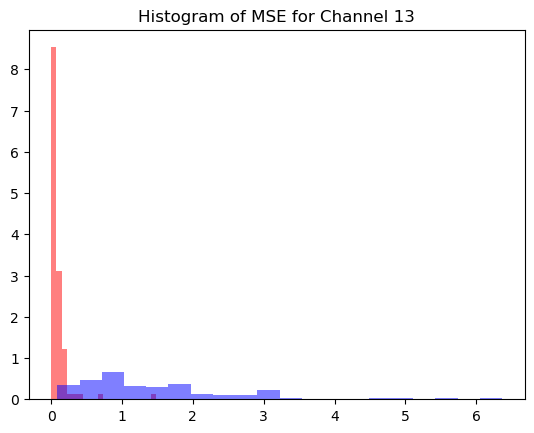

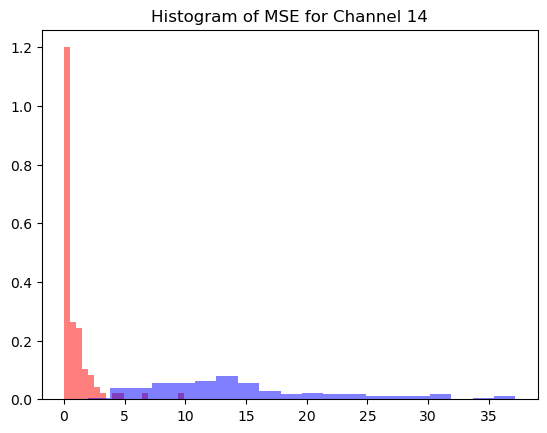

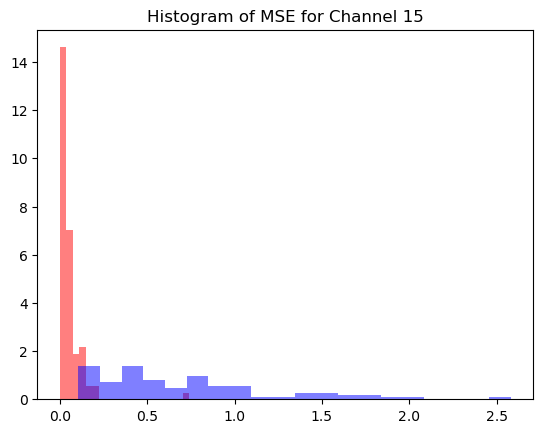

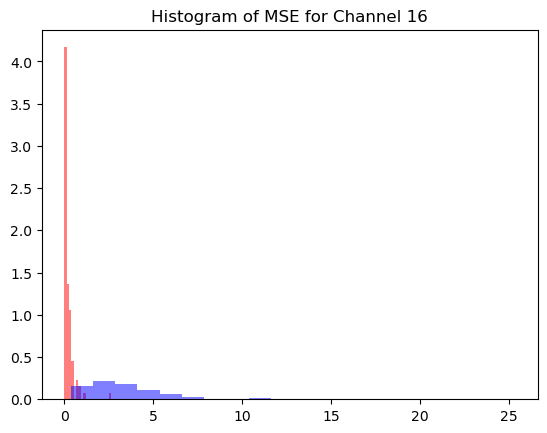

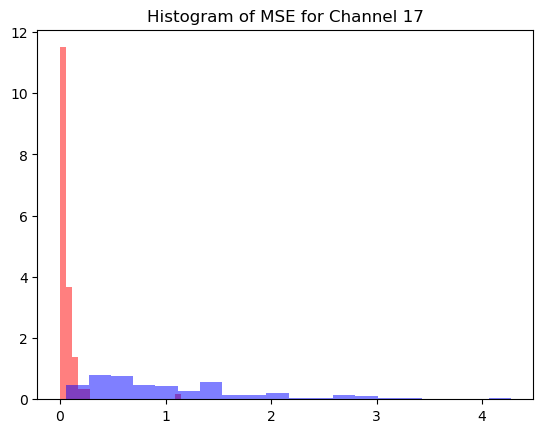

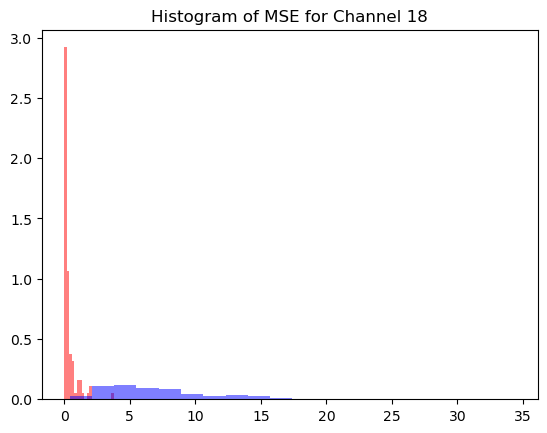

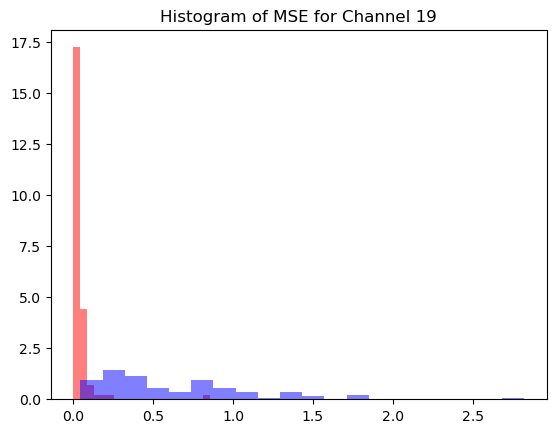

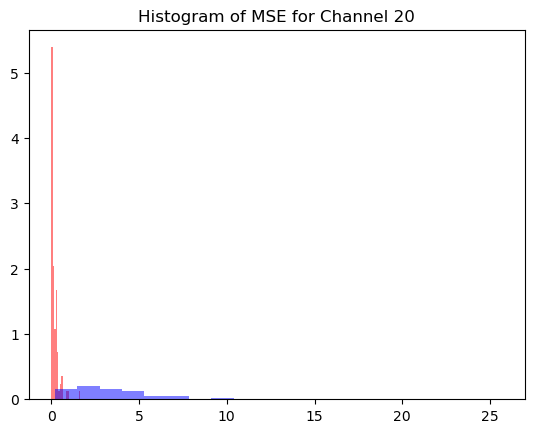

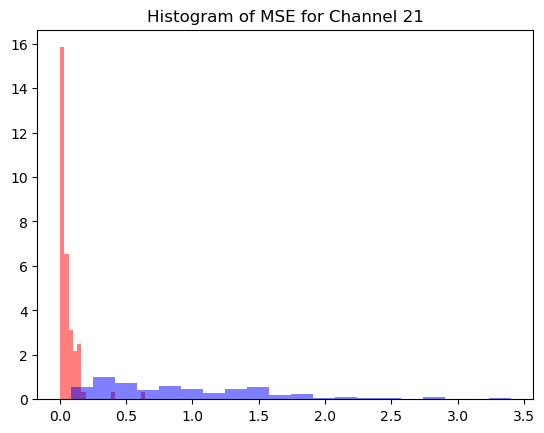

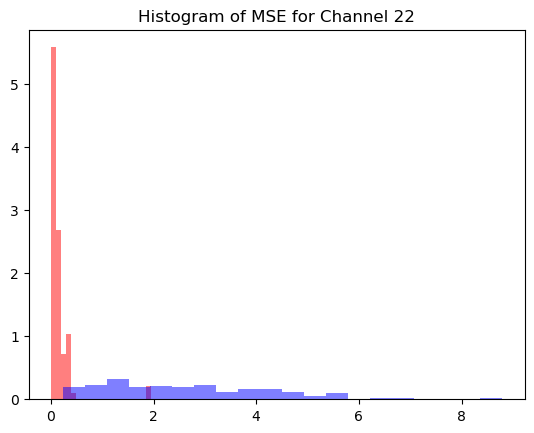

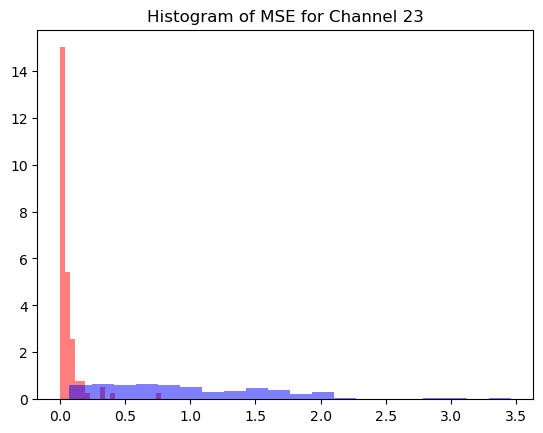

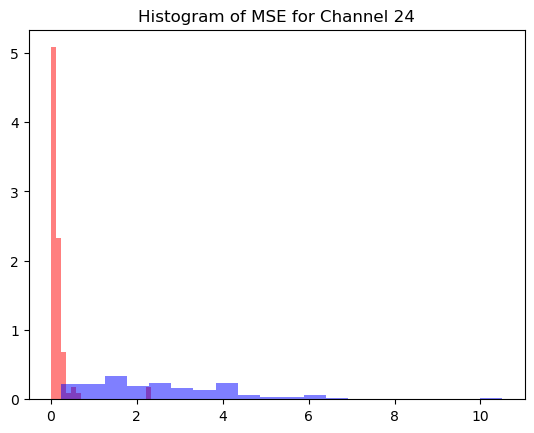

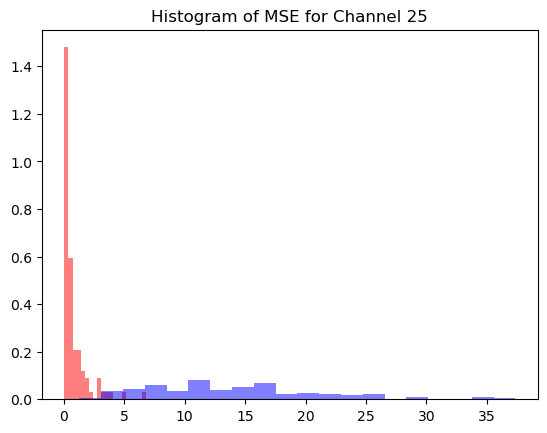

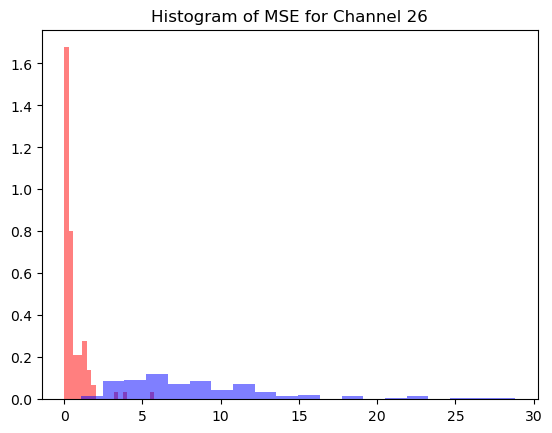

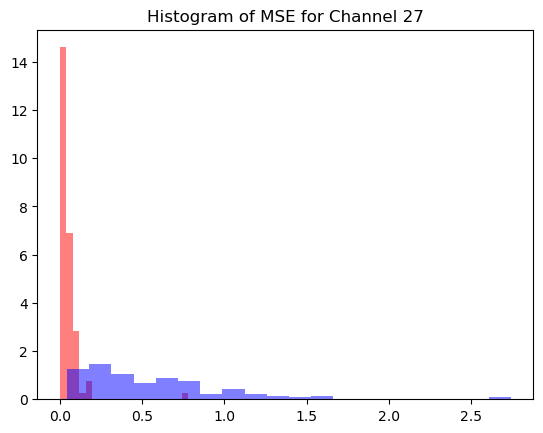

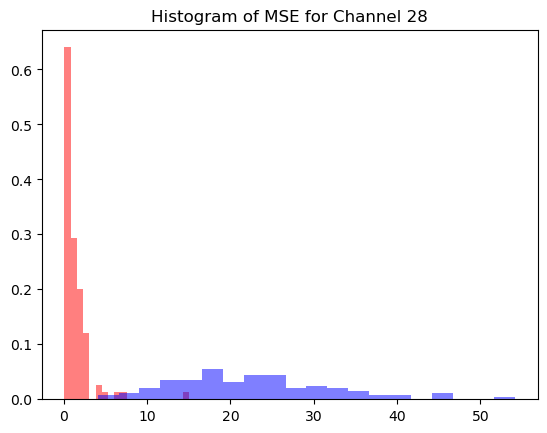

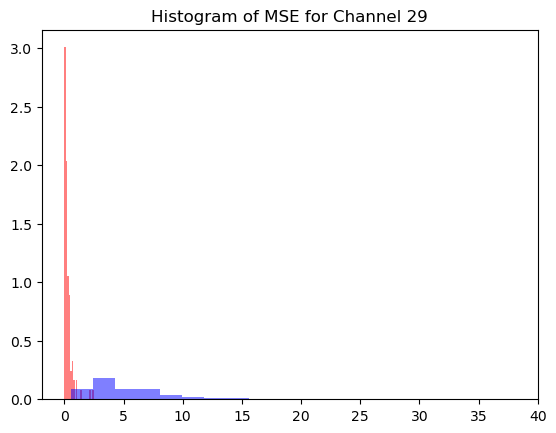

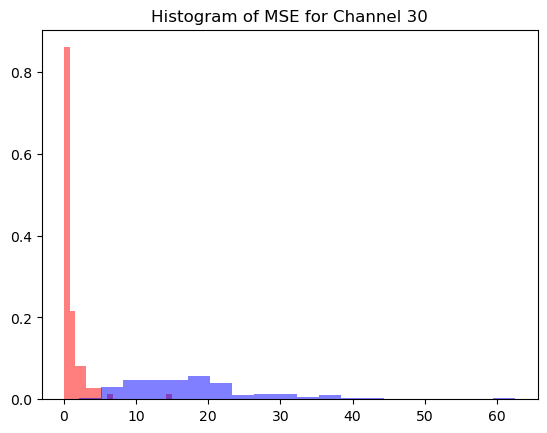

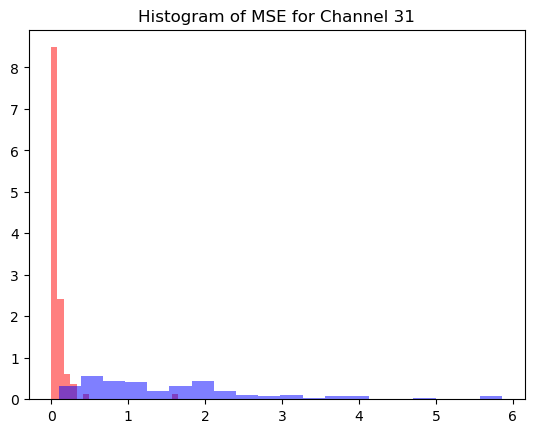

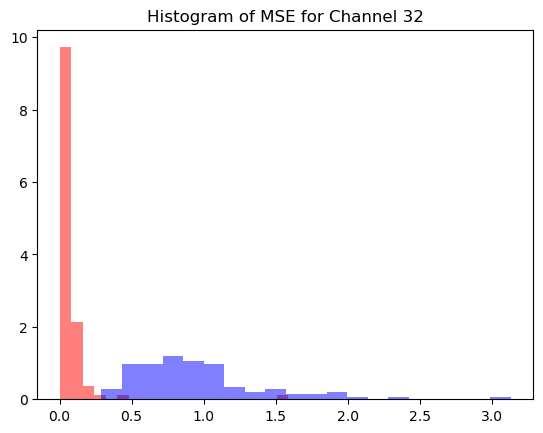

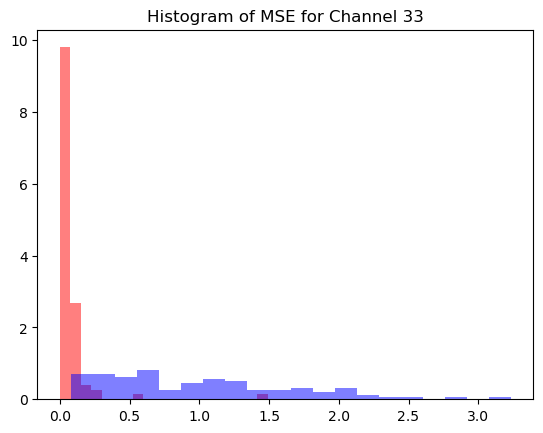

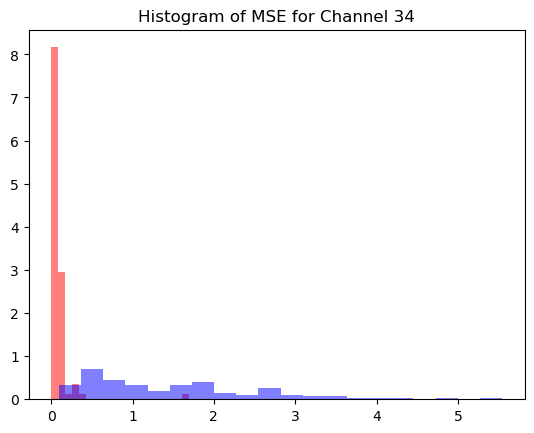

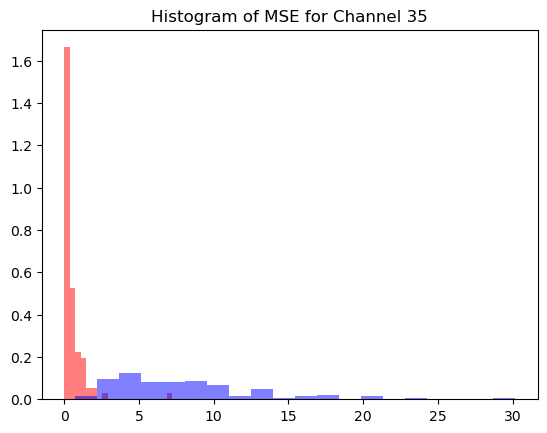

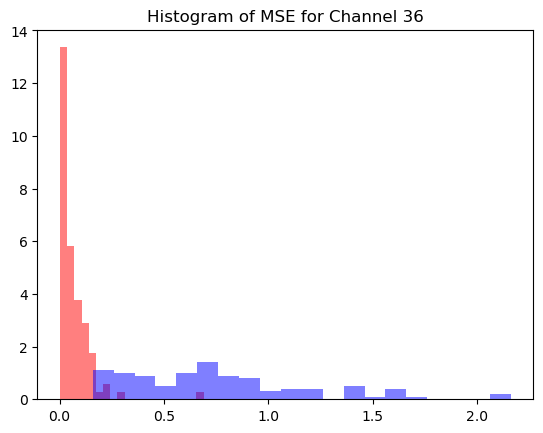

KeyboardInterrupt: 

In [17]:
print(tp_mse_result.shape) # rows: channels, cols: img_pairs
print(au_mse_result.shape)

# Number of rows and columns for subplots (adjust as needed)
num_rows = 192
num_cols = 1

# Plot histograms
for i in range(192):
    plt.hist(tp_mse_result[i], bins=20, alpha=0.5, label='Tampered', density=True, color='red')
    plt.hist(au_mse_result[i], bins=20, alpha=0.5, label='Authentic', density=True, color='blue')
    plt.title(f'Histogram of MSE for Channel {i+1}')
    plt.show()

# Adjust layout
# plt.tight_layout()

# Save the figure to a file
plt.savefig('histograms_mse.png', dpi=300)

# Display the plot (optional)



In [9]:
# Do a one-sided t-test to find significant channels
# Store p-values
p_values = []

# Perform one-sided t-tests for each channel
for tp_vals, au_vals in zip(tp_mse_result, au_mse_result):
    print(tp_vals.shape, au_vals.shape)
    # Perform one-sided t-test
    _, p_value = ttest_ind(tp_vals, au_vals, alternative='greater')
    p_values.append(p_value)


# Convert p-values list to numpy array
p_values = np.array(p_values)

# Apply Benjamini-Hochberg correction
_, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Identify significant channels
significant_channels = np.where(p_values_corrected < 0.05)[0]

# Print results
print("Significant channels where intra-class MSE is higher than inter-class MSE:")
print(significant_channels)

(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,)

In [6]:
print(p_values)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
